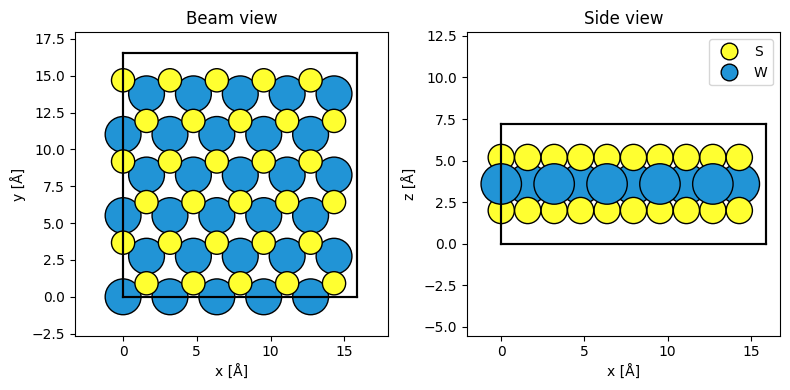

In [1]:
import ase
import abtem
import matplotlib.pyplot as plt

atoms = ase.build.mx2("WS2", vacuum=2)

atoms = abtem.orthogonalize_cell(atoms) * (5, 3, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
abtem.show_atoms(atoms, ax=ax1, title="Beam view")
abtem.show_atoms(atoms, plane="xz", ax=ax2, title="Side view", legend=True)
fig.tight_layout()

In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import ase
from abtem.reconstruct import RegularizedPtychographicOperator
from matplotlib import pyplot as plt

import abtem

[########################################] | 100% Completed | 105.11 ms
[########################################] | 100% Completed | 105.69 ms


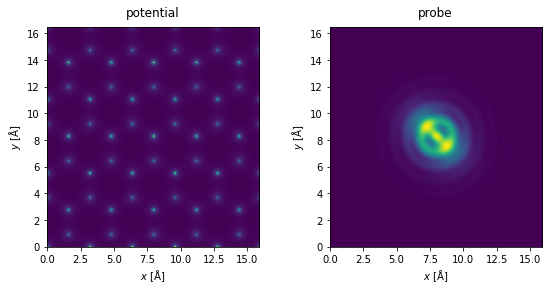

In [38]:
potential = abtem.Potential(
    atoms,
    sampling=0.05,
)

aberrations = {"C10": -130, "C12": 20, "phi12": 0.785, "C30": -2e4}

#aberrations = {"C10": 0, "C12": 0, "phi12": 0, "C30": 0}


probe = abtem.Probe(semiangle_cutoff=20, energy=100e3, **aberrations)

probe.grid.match(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
potential.show(ax=ax1, title="potential")
probe.show(ax=ax2, title="probe")
fig.tight_layout()



In [4]:
scan = abtem.GridScan(
    start=(0, 0), end=(1 / 5, 1 / 3), fractional=True, potential=potential,
)

pixelated_detector = abtem.PixelatedDetector()

diffraction_patterns = probe.scan(potential, scan=scan, detectors=pixelated_detector)

diffraction_patterns.compute()


[########################################] | 100% Completed | 6.12 sms


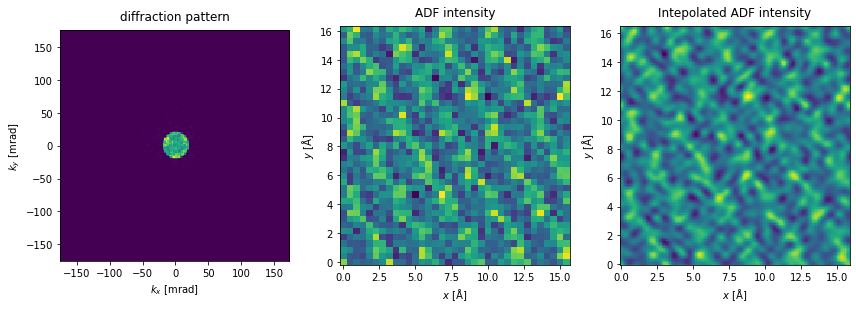

In [ ]:
tiled_measurements = diffraction_patterns.tile_scan((5, 3)).poisson_noise(1e5)
cropped_measurements = tiled_measurements.crop(max_angle=80)
print(cropped_measurements)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
cropped_measurements.show(ax=ax1, title="diffraction pattern", units="mrad")
tiled_measurements.integrate_radial(50, 150).show(
    ax=ax2, title="ADF intensity"
)
tiled_measurements.integrate_radial(50, 150).interpolate(.1).show(
    ax=ax3, title="Intepolated ADF intensity"
)

plt.tight_layout()

In [14]:
from abtem.reconstruct import RegularizedPtychographicOperator
#crop the probe to match the cropped measurements
print(type(probe))

tiled_measurements = diffraction_patterns.tile_scan((5, 3)).poisson_noise(1e5)
cropped_measurements = tiled_measurements.crop(max_angle=80)

from skimage.transform import resize

#probe = probe.crop(max_angle=80)


<class 'abtem.waves.Probe'>


In [59]:
print(probe.gpts)
# diffraction_patterns.shape[-2:]
# probe.grid.match((318, 331))

probe = abtem.Probe(semiangle_cutoff=20, energy=100e3, **aberrations)

probe = abtem.Probe(semiangle_cutoff=20, energy=100e3, **aberrations, gpts=(69, 73))


ptycho_operator = RegularizedPtychographicOperator(
    cropped_measurements,
    parameters={"object_px_padding": (0, 0)},
    probes=probe
    )

ptycho_operator.preprocess()

(318, 331)


GridUndefinedError: grid is not defined

In [56]:
rpie_objects, rpie_probes, rpie_positions, rpie_sse = ptycho_operator.reconstruct(
    max_iterations=20, return_iterations=True, random_seed=1, verbose=True
)

Ptychographic reconstruction will perform the following steps:
--Regularized PIE for 27300 steps
--Probe correction is enabled
----Iteration 0 , SSE = 5.727e-06
----Iteration 1 , SSE = 5.680e-06
----Iteration 2 , SSE = 5.716e-06
----Iteration 3 , SSE = 5.668e-06
----Iteration 4 , SSE = 5.616e-06
----Iteration 5 , SSE = 5.626e-06
----Iteration 6 , SSE = 5.622e-06
----Iteration 7 , SSE = 5.618e-06
----Iteration 8 , SSE = 5.593e-06
----Iteration 9 , SSE = 5.583e-06
----Iteration 10, SSE = 5.581e-06
----Iteration 11, SSE = 5.546e-06
----Iteration 12, SSE = 5.514e-06
----Iteration 13, SSE = 5.515e-06
----Iteration 14, SSE = 5.500e-06
----Iteration 15, SSE = 5.469e-06
----Iteration 16, SSE = 5.474e-06
----Iteration 17, SSE = 5.434e-06
----Iteration 18, SSE = 5.443e-06
----Iteration 19, SSE = 5.434e-06


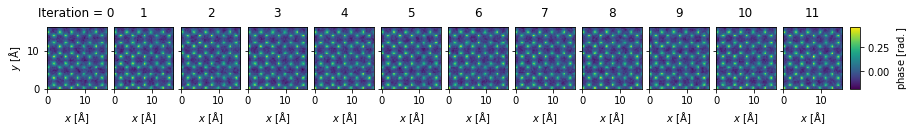

In [49]:
rpie_objects.phase().show(
    explode=True, figsize=(14, 12), cbar=True, common_color_scale=True
);

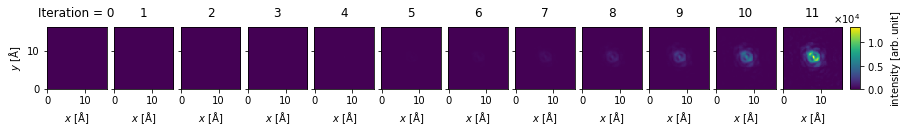

In [50]:
rpie_probes.intensity().show(
    explode=True, figsize=(14, 12), cbar=True, common_color_scale=True, #vmax=1.8e-6
);

[########################################] | 100% Completed | 101.57 ms
[########################################] | 100% Completed | 103.37 ms


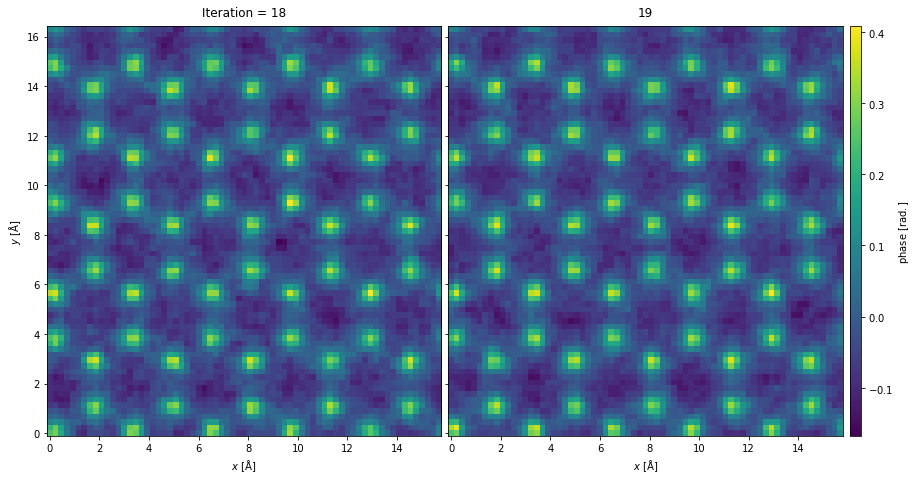

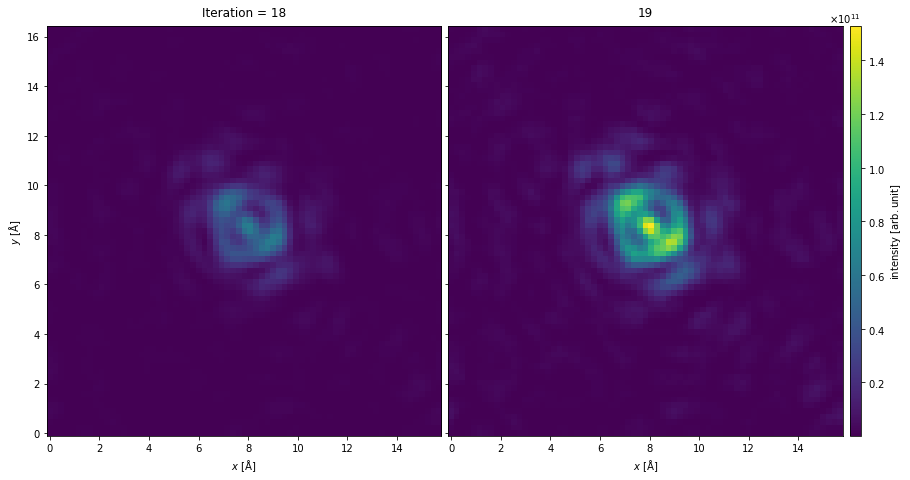

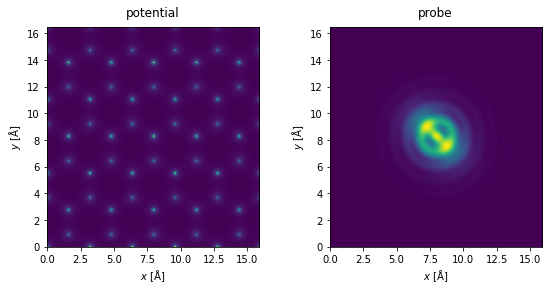

In [57]:
rpie_objects[18:].phase().show(
    explode=True, figsize=(14, 12), cbar=True, common_color_scale=True
);
rpie_probes[18:].intensity().show(
    explode=True, figsize=(14, 12), cbar=True, common_color_scale=True, #vmax=1.8e-6
);
probe = abtem.Probe(semiangle_cutoff=20, energy=100e3, **aberrations)

probe.grid.match(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
potential.show(ax=ax1, title="potential")
probe.show(ax=ax2, title="probe")
fig.tight_layout()

In [ ]:
print(rpie_probes[0].gpts)

AttributeError: 'Images' object has no attribute 'gpts'